In [7]:
# 필요한 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 고해상도 디스플레이 설정
%config InlineBackend.figure_format = 'retina'
# 폰트를 'Malgun Gothic'으로 설정
plt.rcParams['font.family'] = "Malgun Gothic"
# 마이너스 부호 깨짐 현상 해결
plt.rcParams["axes.unicode_minus"] = False

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# Seaborn 시각화 패키지 임포트
import seaborn as sns
sns.set(font="Malgun Gothic",             # 폰트 설정
        rc={"axes.unicode_minus":False},  # 마이너스 부호 깨짐 현상 방지
        style="darkgrid")                 # 테마

In [8]:
df = pd.read_excel('산악지역이동통신무선국_분석용.xlsx')

# 연도별 허가건수 시각화

In [14]:
data = df.groupby(by = ['허가연도'], as_index=False)[['허가번호']].count()
data.rename(columns={'허가번호' : '무선국 허가건수'}, inplace=True)

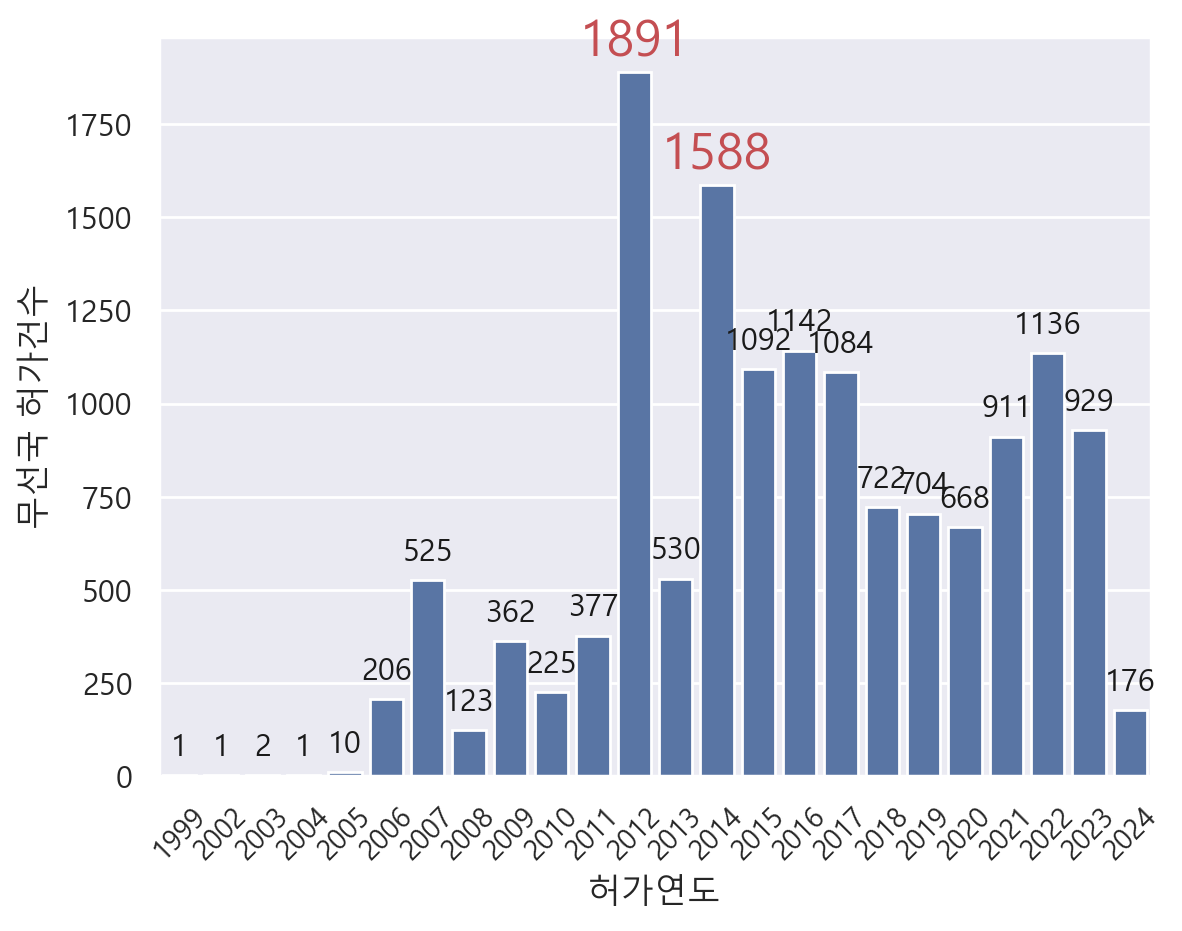

In [21]:
# 막대그래프 생성
ax = sns.barplot(data = data,
                x= "허가연도",
                y= "무선국 허가건수")

# 막대 위 수치를 보여줌
for idx, p in enumerate(ax.patches) :
    
    # 제일 큰 수치는 붉은색, 20point 로 표시
    if idx in [11, 13]: # 제일 큰 수치의 인덱스
        ax.annotate("%.0f" % p.get_height(),    # 텍스트
                    (p.get_x() + p.get_width()/2, p.get_height()), # xy, 텍스트 표시 위치
                    ha='center', va='center',   # 텍스트 정렬
                    fontsize=18, color='r',     # 글자크기, 색깔
                    xytext=(0, 10),             # 텍스트가 출력될 위치
                    textcoords='offset points') # 해당 위치가 어떤 좌표계를 따르는지를 지정
        
    # 다른 수치는 검정색, 15point 로 표시
    else : 
        ax.annotate("%.0f" % p.get_height(), 
                    (p.get_x() + p.get_width()/2, p.get_height()), #
                    ha='center', va='center', 
                    fontsize=11, color='k',
                    xytext=(0, 10),
                    textcoords='offset points')
        
# X축 글자크기 12, 45도 회전
plt.xticks(fontsize=10, rotation=45)
# png파일로 저장
plt.savefig('연도별허가건수.png', dpi = 400, bbox_inches='tight')
plt.show()

### 공원구분(국립, 도립, 군립)별 무선국 개수 시각화

In [39]:
tmp = df.loc[df['구분'] == gubun, :]

data1 = tmp.groupby(by = ['이름'], as_index=False)[['허가번호']].count()
data1.rename(columns={'허가번호' : '무선국 개수'}, inplace=True)
data1 = data1.sort_values(by = '무선국 개수', ascending = False)

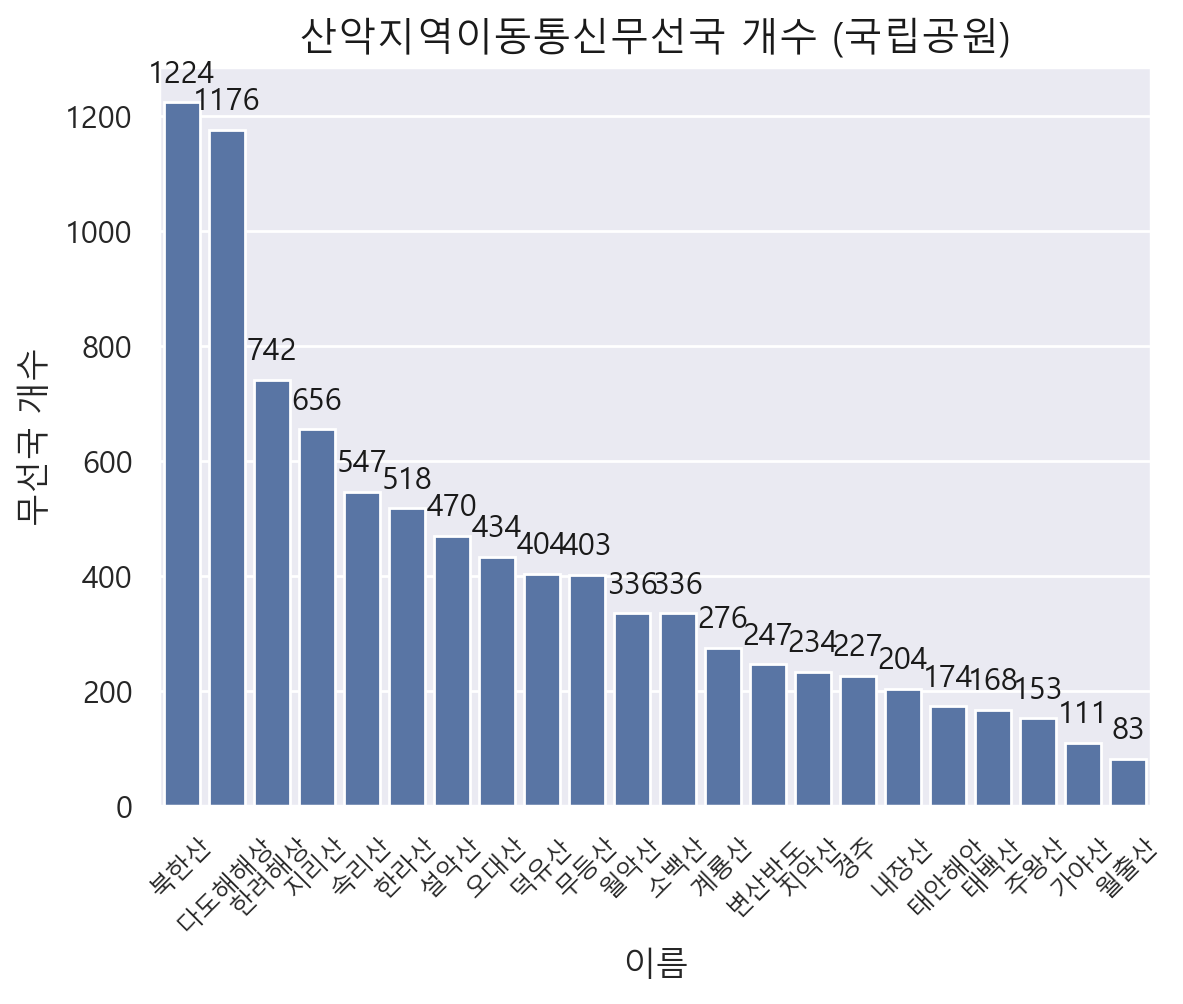

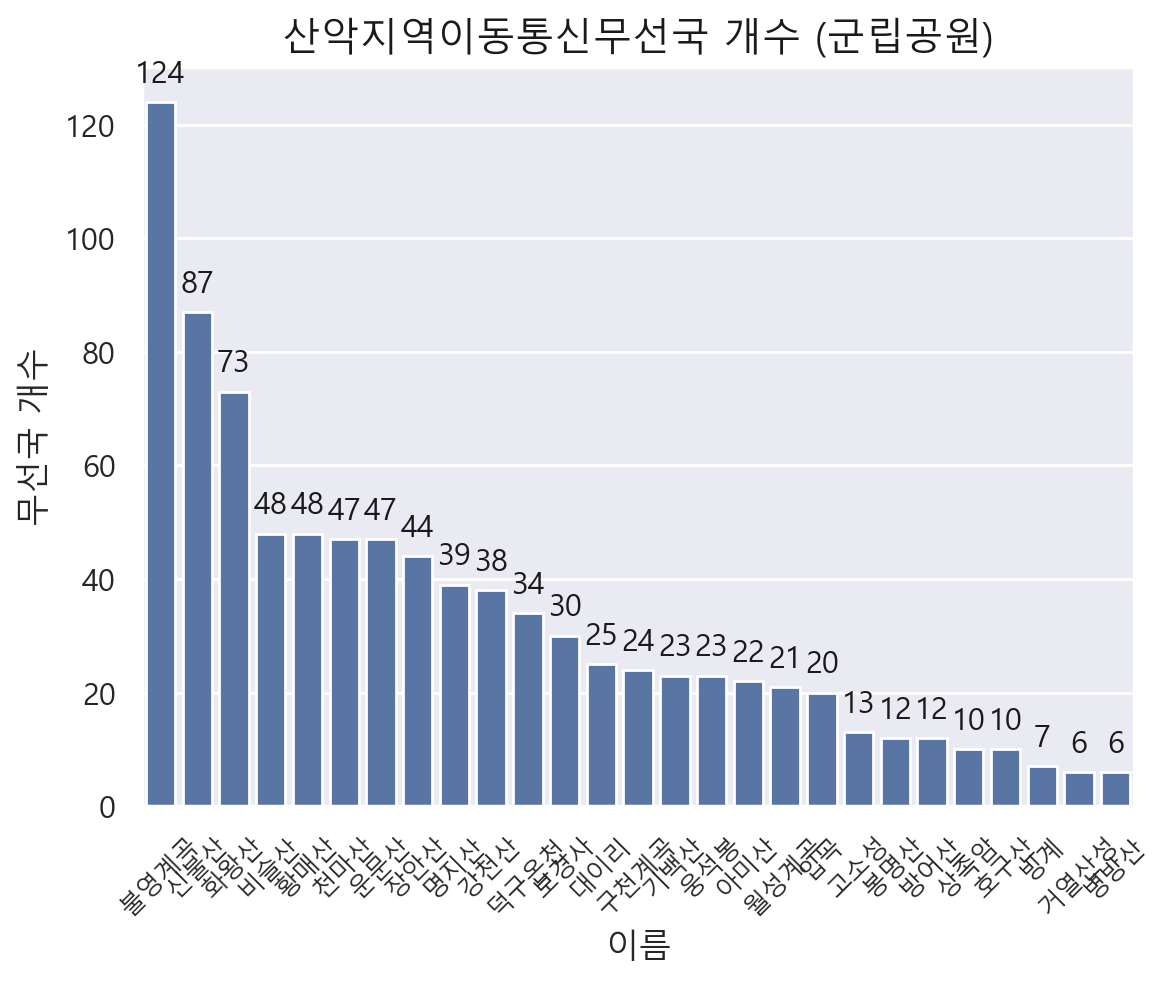

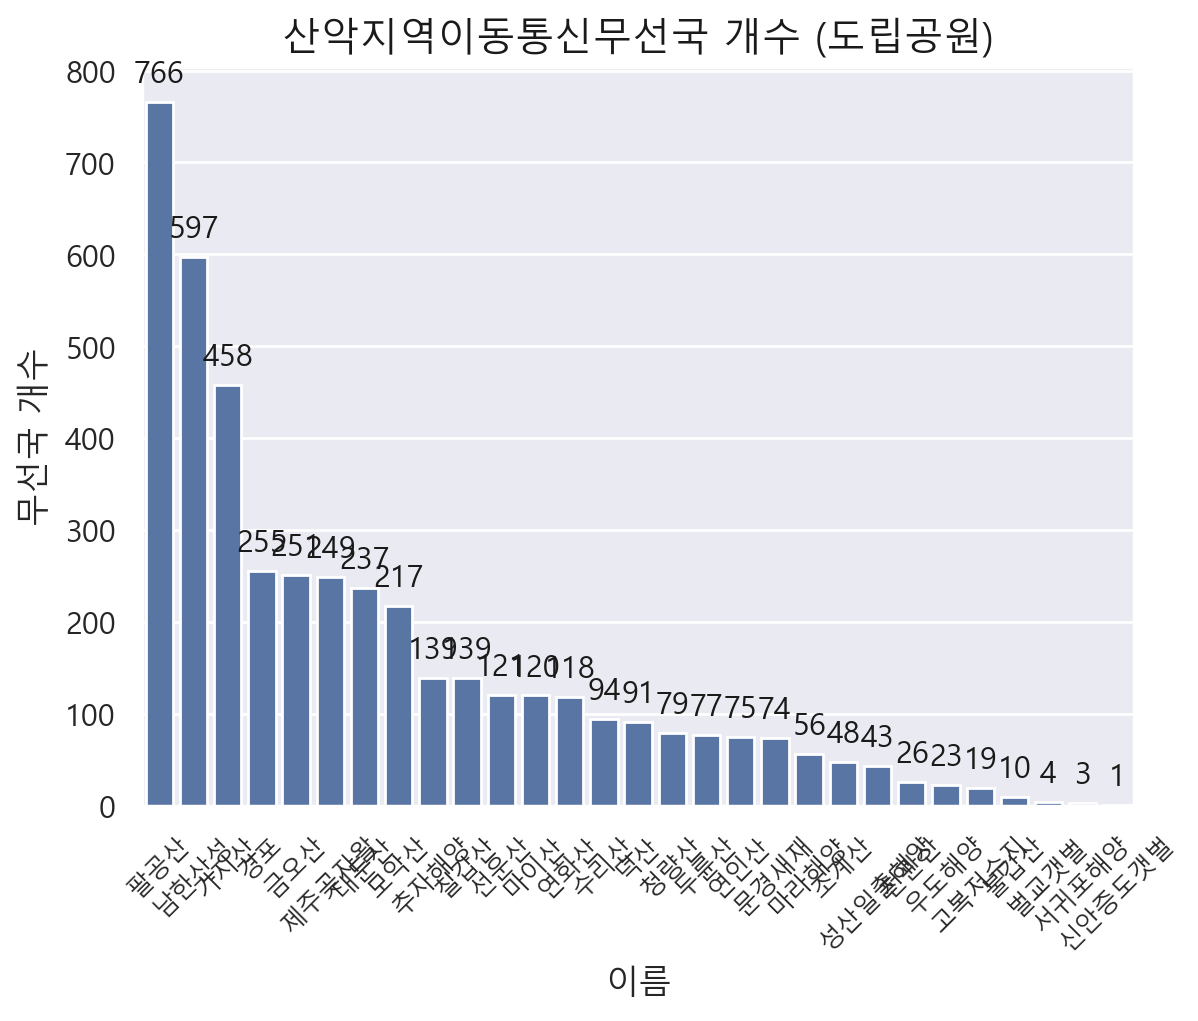

In [66]:
for _, gubun in enumerate(np.unique(df['구분'])):
    tmp = df.loc[df['구분'] == gubun, :]

    data1 = tmp.groupby(by = ['이름'], as_index=False)[['허가번호']].count()
    data1.rename(columns={'허가번호' : '무선국 개수'}, inplace=True)
    data1 = data1.sort_values(by = '무선국 개수', ascending = False)

    # data1.to_csv('산악지역무선국개수_'+str(gubun)+'.csv', 
    #              encoding = 'cp949', index = None)

    file_name = '산악지역무선국개수_'+str(gubun)+'.png'

    # 막대그래프 생성
    ax = sns.barplot(data = data1,
                    x= "이름",
                    y= "무선국 개수")

    # 제목 추가: sido 값 사용
    ax.set_title(f'산악지역이동통신무선국 개수 ({str(gubun)})', fontsize=14, color='k')
    
    # 막대 위 수치를 보여줌
    for idx, p in enumerate(ax.patches) :

        ax.annotate("%.0f" % p.get_height(), 
                    (p.get_x() + p.get_width()/2, p.get_height()), #
                    ha='center', va='center', 
                    fontsize=11, color='k',
                    xytext=(0, 10),
                    textcoords='offset points')
            
    # X축 글자크기 12, 45도 회전
    plt.xticks(fontsize=9, rotation=45)
    # png파일로 저장
    plt.savefig(file_name, dpi = 400, bbox_inches='tight')
    plt.show()

# 통신사별 무선국 비율 시각화

In [38]:
# 결측치 보정
df['시설자명'] = df['시설자명'].fillna('기타')

In [66]:
data = df.groupby(by = ['시설자명'], as_index=False)[['허가번호']].count()
data.rename(columns={'허가번호' : '무선국 개수'}, inplace=True)
data = data.sort_values(by = '무선국 개수', ascending = False)

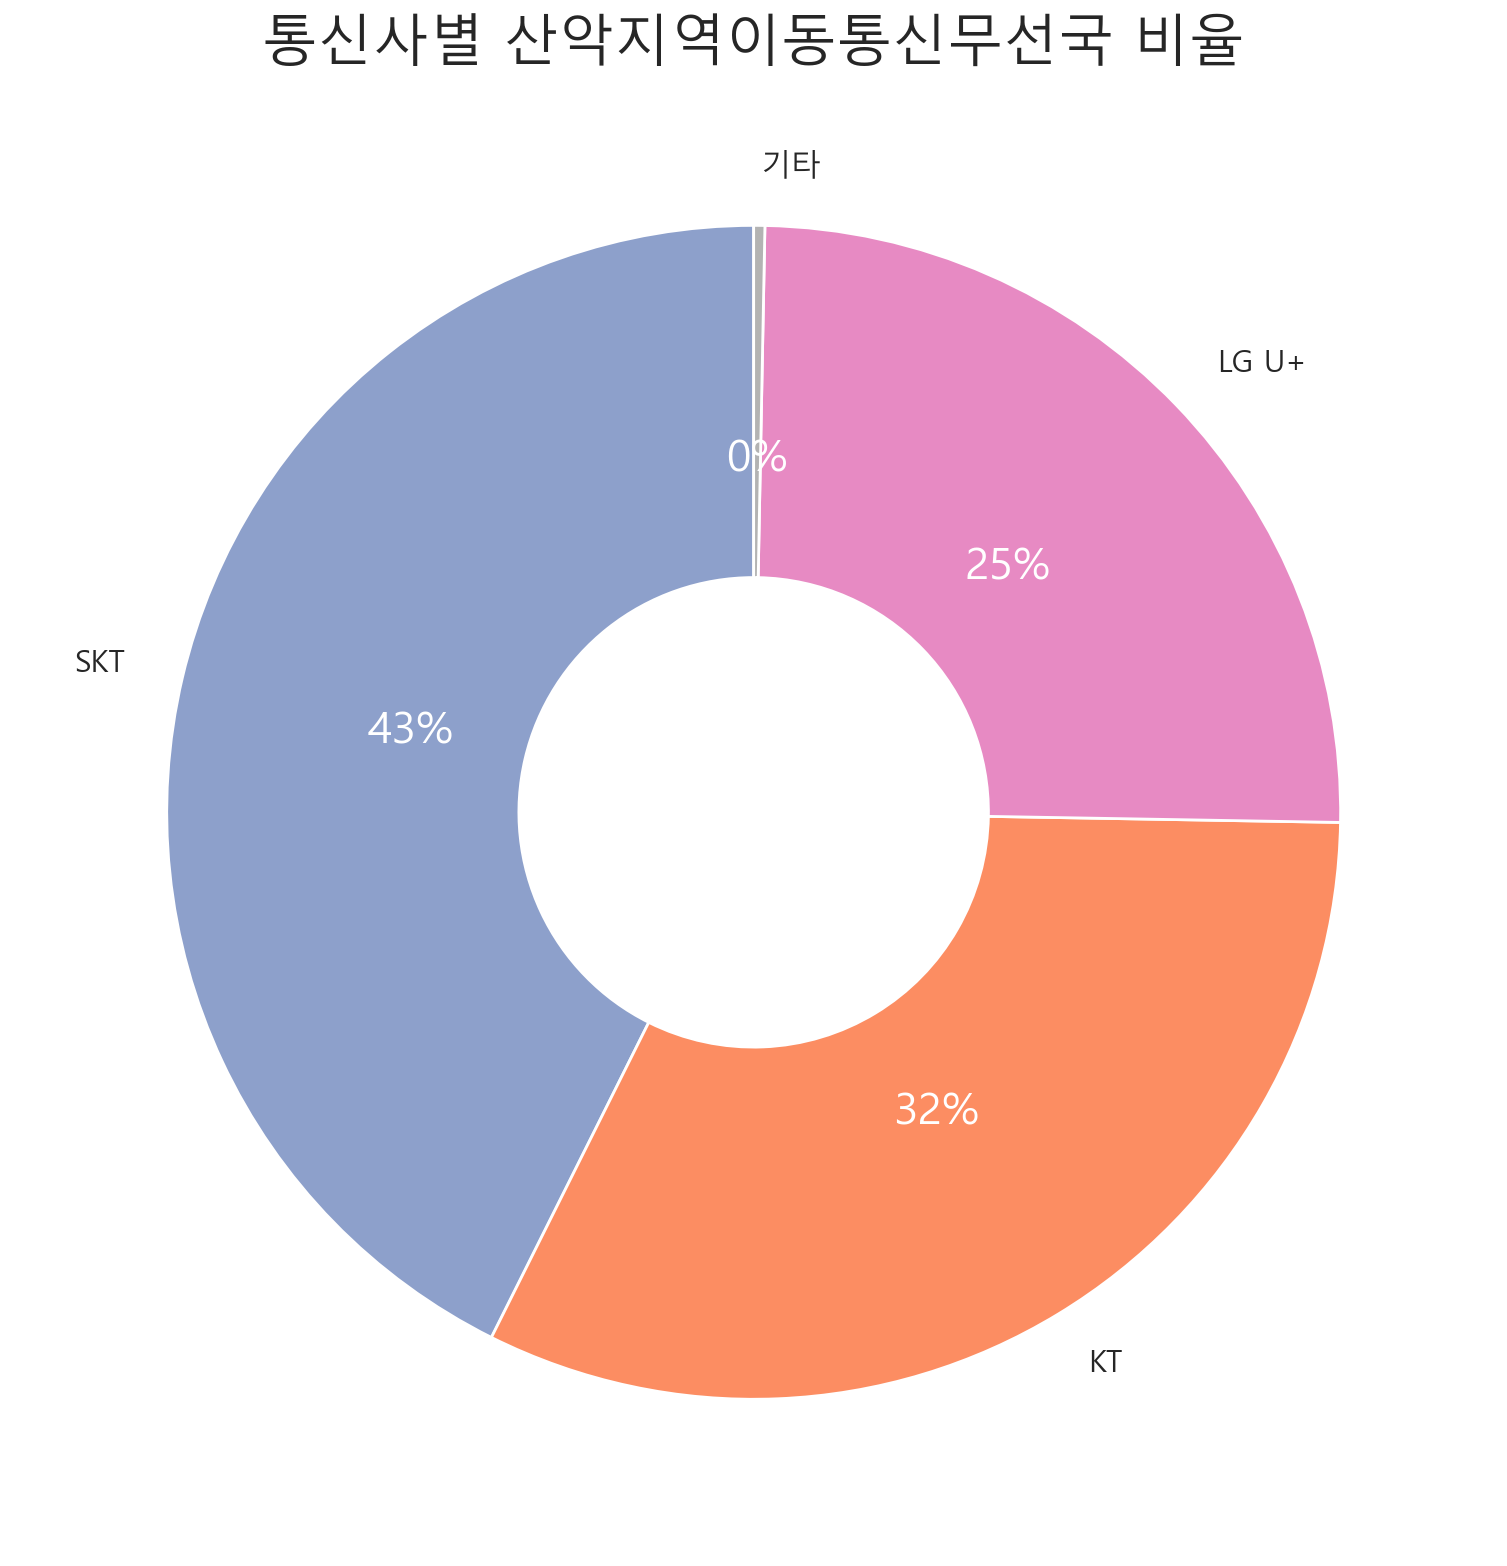

In [72]:
# 도넛 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8))  # 차트 크기 조정

# 색상 지정 seaborn Set2
colors = [
    '#8da0cb', # SKT (연한 파랑색)
    '#fc8d62', # KT (주황색)
    '#e78ac3', # LG U+(연한 분홍색)
    '#b3b3b3' # 기타(회색)
]

# 원형 차트 그리기, 'wedgeprops'로 두께 조정
wedges, texts, autotexts = ax.pie(data['무선국 개수'], 
                                  labels=data['시설자명'],  # 주파수 라벨은 차트에 표시하지 않음
                                  autopct='%1.0f%%', 
                                  startangle=90,
                                  wedgeprops=dict(width=0.6), 
                                  colors=colors)

# 비율만 보이도록 하기 위한 설정
for text in autotexts:
    text.set_fontsize(16)
    text.set_color('white')  # 비율 숫자는 흰색으로 설정

# 차트 제목
ax.set_title("통신사별 산악지역이동통신무선국 비율", size = 20)

# 차트 보이기
plt.tight_layout()  # 레이아웃 자동 조정
plt.savefig("통신사별산악지역이동통신무선국비율.png", dpi = 400, bbox_inches='tight')
plt.show()

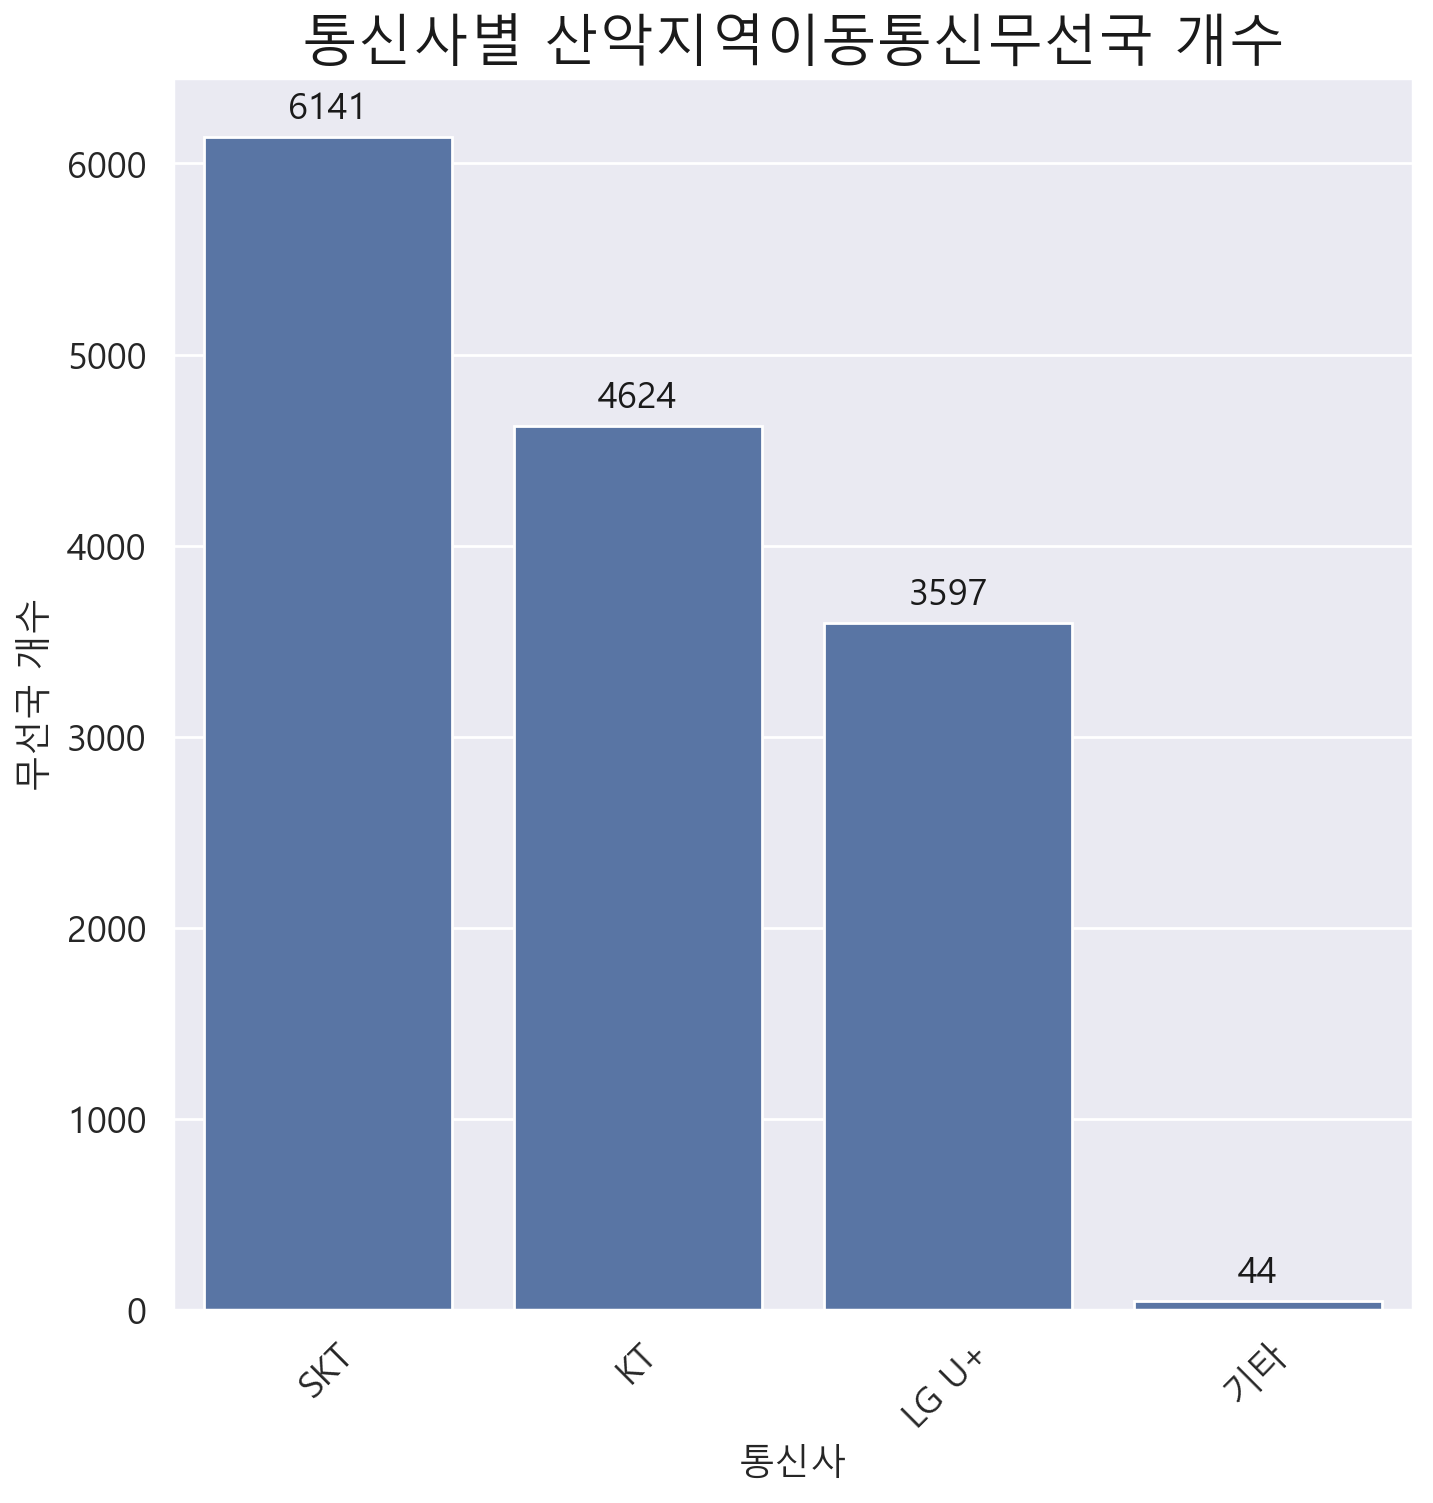

In [100]:
# 도넛 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8))  # 차트 크기 조정

# 막대그래프 생성
ax = sns.barplot(data = data,
                x= "시설자명",
                y= "무선국 개수")

# 막대 위 수치를 보여줌
for idx, p in enumerate(ax.patches) :

    ax.annotate("%.0f" % p.get_height(), 
                (p.get_x() + p.get_width()/2, p.get_height()), #
                ha='center', va='center', 
                fontsize=13, color='k',
                xytext=(0, 10),
                textcoords='offset points')
        
# X축 글자크기 12, 45도 회전
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.xlabel('통신사', fontsize=13)
plt.ylabel('무선국 개수', fontsize=13)
# png파일로 저장

# 제목 추가: sido 값 사용
ax.set_title('통신사별 산악지역이동통신무선국 개수', fontsize=20, color='k')

plt.savefig('통신사별산악지역이동통신무선국개수.png', dpi = 400, bbox_inches='tight')
plt.show()

# 통신사별 주파수 분포

In [174]:
# 데이터 보정
data = df.loc[df['시설자명'] != '기타', :]

In [136]:
# seaborn 세팅
sns.set(font="Malgun Gothic",             # 폰트 설정
        rc={"axes.unicode_minus":False})  # 마이너스 부호 깨짐 현상 방지
sns.set_theme(style="white",                       # 테마 
              rc={"axes.facecolor": (0, 0, 0, 0)}) # 배경 색 (투명하게)

### 통신사별 주파수 분포 (전체)

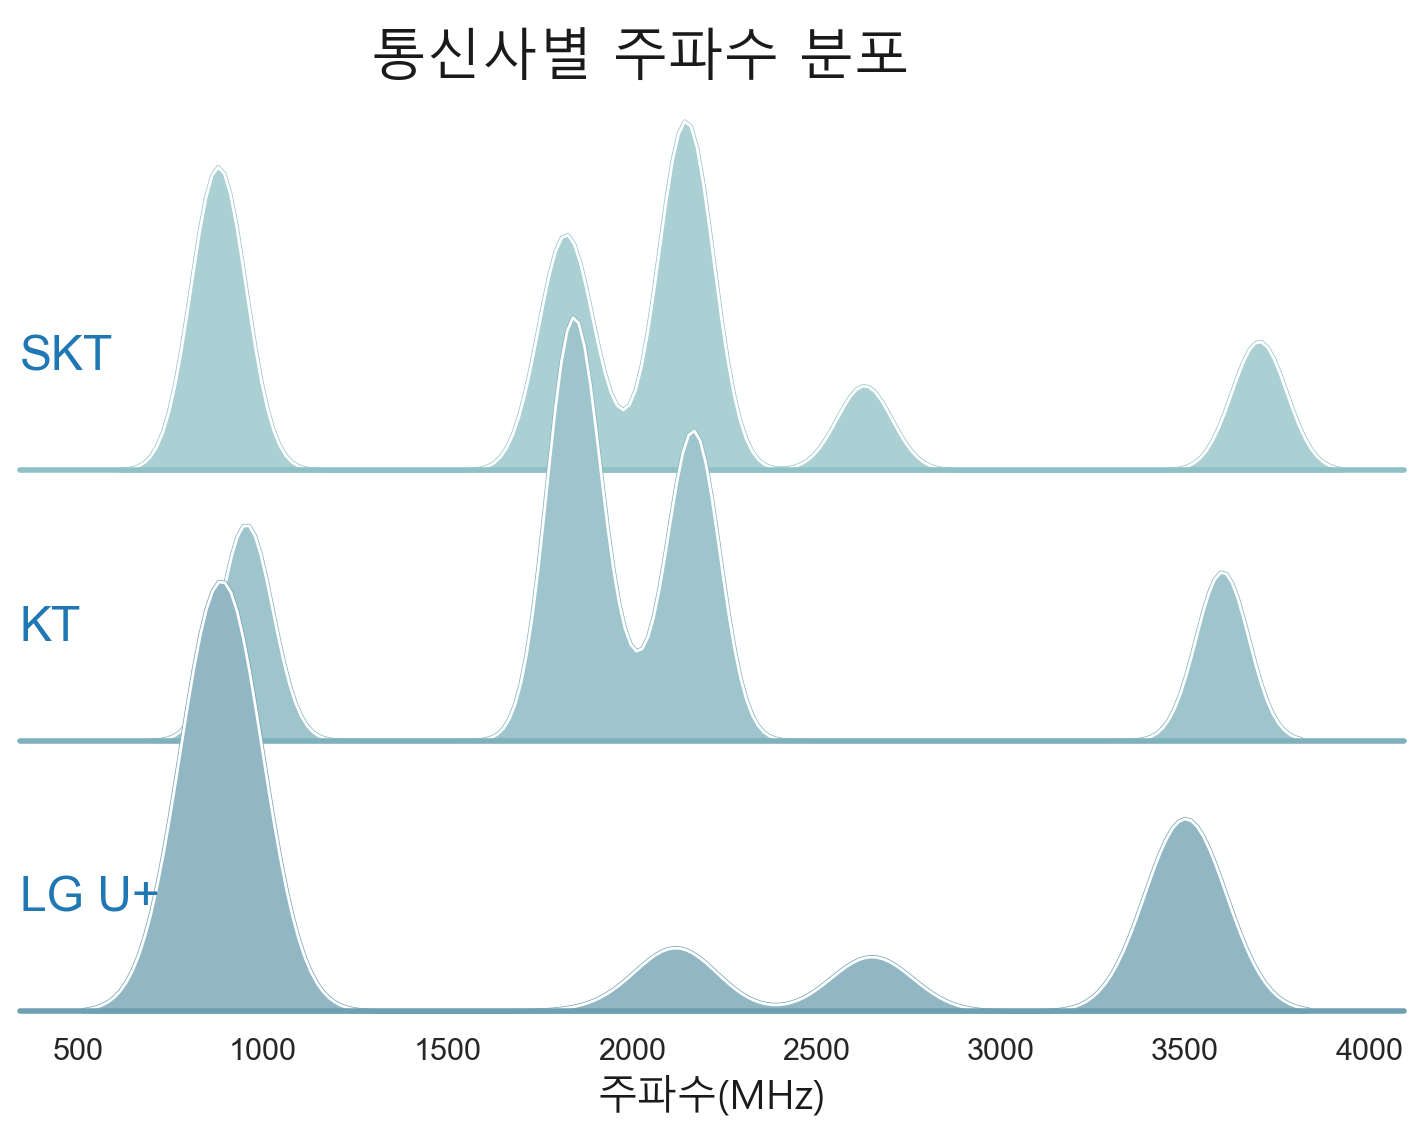

In [206]:
# 색상 설정 (cubehelix)
pal = sns.cubehelix_palette(n_colors=10,  # 색상의 수
                            rot=-.25,    # 색상 회전 값
                            light=.7)    # 색상 밝기

# Create FacetGrid object
# 데이터를 통신사별로 나눈다. (행 기준으로 나눈다)
g = sns.FacetGrid(data=data, 
                  row='시설자명',  # 통신사별로 행을 나눈다
                  hue='시설자명',  # 해당 값으로 색 구분
                  aspect=4,         # 각 그림의 가로 세로 비율 (가로 = 세로 * 4)
                  height=2,         # 각 그림의 세로 크기
                  sharey=True,      # X축 공유
                  sharex=True,      # Y축 공유
                  palette=pal)      # 색 설정

# kde (커널 밀도 차트)
g.map(sns.kdeplot, 
      '주파수(MHz)',         # X축에 사용할 변수
      clip_on=False,         # 그래프 영역을 벗어나는 부분(마이너스 등) 잘라내기
      bw_adjust=.5,          # 대역폭 조정
      fill=True,             # 색 채우기
      alpha=1,               # 채우기 색 투명도 0 (투명) - 1 (불투명)
      linewidth=1.5)         # 선 굵기

# kde - line
g.map(sns.kdeplot, 
      '주파수(MHz)',
      clip_on=False,
      bw_adjust=.5,
      fill=True,
      linewidth=1,
      color="w")

# refline : reference line (기준선)
g.refline(y=0, 
          linewidth=2,
          linestyle="-",
          color=None,
          clip_on=False)

# 각 차트의 제목 없애기
g.set_titles(template='',  # 제목을 빈 문자열로 설정
             row_template="{row_name}")  # 행의 각 차트에 통신사 이름을 표시

# axes 직접 접근, 1차원 행렬로 표현
axs = g.axes.ravel()
# 각 차트에 직접 접근해서 title과 text를 직접 설정한다.
for i, ax in enumerate(axs):
    # 각 차트의 왼쪽에 통신사 이름을 보여준다.
    ax.annotate(list(g.axes_dict.keys())[i], 
                xy=(0, 0.25), xycoords="axes fraction", rotation=0, 
                ha="left", va="center",
                fontsize="x-large", color='tab:blue')

    # 아래 X축 라벨 설정 (중복 방지)
    ax.set_xlabel(xlabel='주파수(MHz)', 
                  fontdict={"fontsize":"large",
                            "color":"k",
                            "family":"Malgun Gothic"})

# Y축 눈금, 라벨 없애기
g.set(yticks=[], ylabel="")
# 축 없애기
g.despine(bottom=True, left=True)
# 차트 위아래가 겹쳐보이기 위한 간격 조정
g.figure.subplots_adjust(hspace=-.4)  # hspace를 수정하여 위아래 간격 조정

# 전체 차트 제목 추가 (FacetGrid의 전체 제목을 추가하는 방법)
g.fig.suptitle('통신사별 주파수 분포', fontsize=20, color='k', family='Malgun Gothic', y=0.925)

# 그래프 저장
plt.savefig('통신사별 주파수 분포.png', dpi = 400)
plt.show()

### 통신사별 주파수 분포 (공원구분)

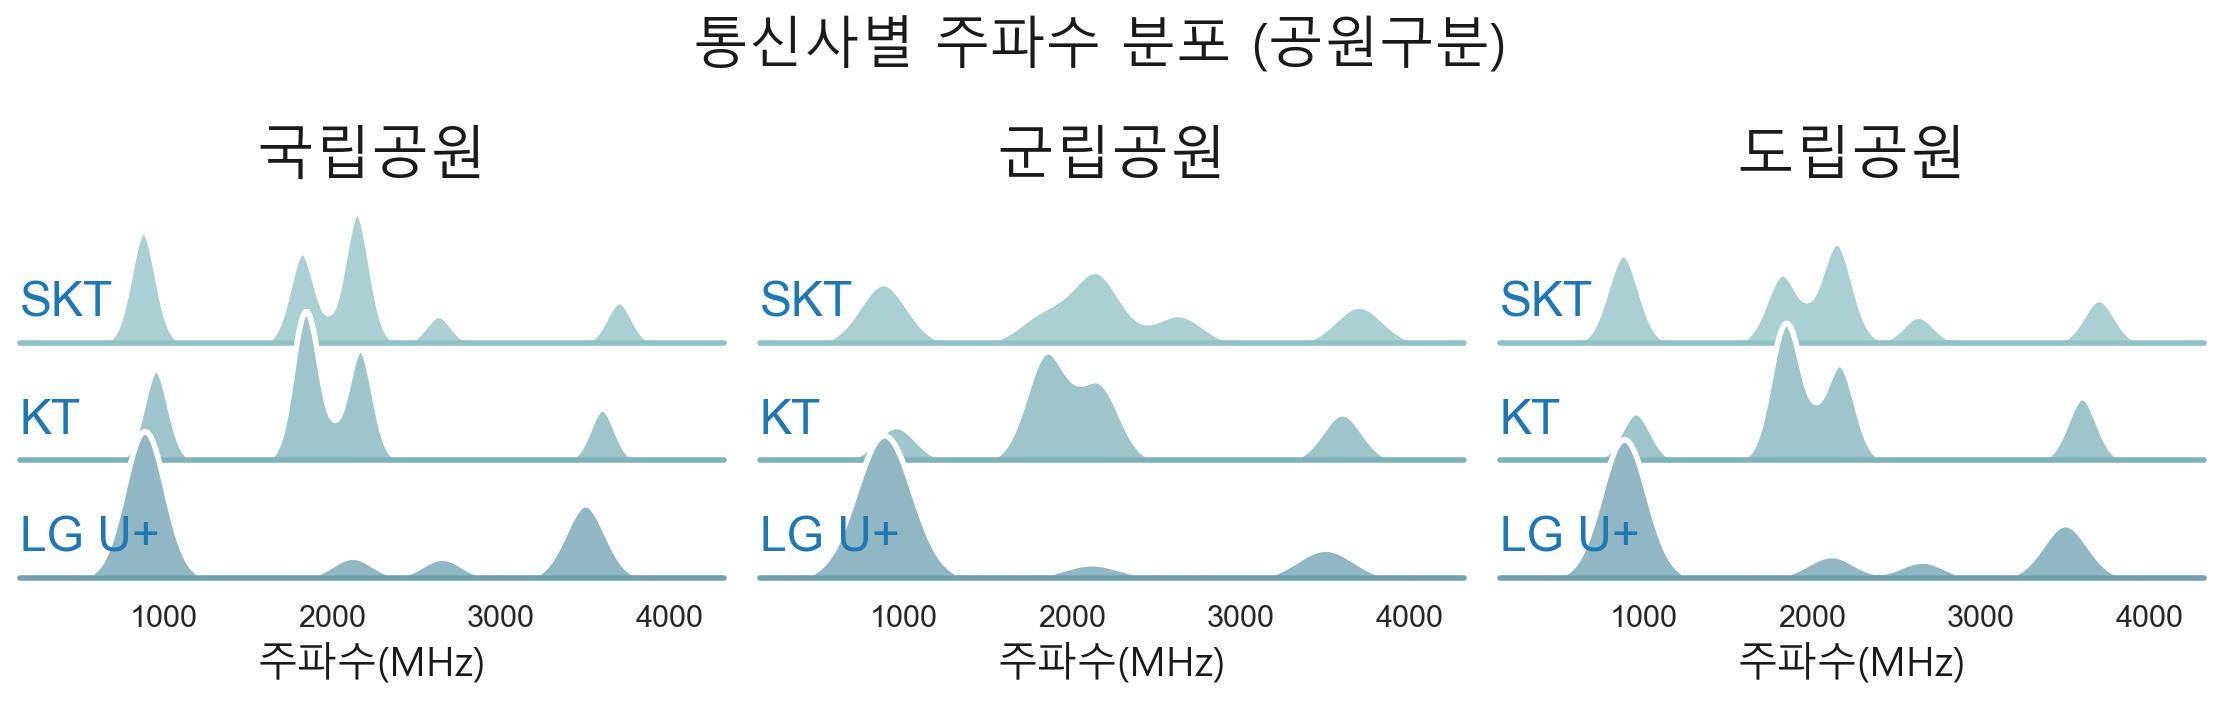

In [268]:
# 색 설정
pal = sns.cubehelix_palette(n_colors=10, # 색상의 수
                            rot=-.25,    # 색상 회전 값
                            light=.7)    # 색상 밝기

# Create FacetGrid object
# 데이터를 다른 묶음(행, 열 기준) 으로 나눈다.
g = sns.FacetGrid(data=data, 
                  row='시설자명', # 행 (범주형)
                  col='구분',    # 열 (범주형)
                  hue='시설자명', # 해당 값으로 색 구분
                  aspect=4,     # 각 그림의 가로 세로 비율 (가로 = 세로 * 4)
                  height=1,     # 각 그림의 세로 크기
                  sharey=True,  # X축 공유
                  sharex=True,  # Y축 공유
                  palette=pal)  # 색 설정

# kde (커널 밀도 차트)
g.map(sns.kdeplot, 
      '주파수(MHz)',         # X축에 사용할 변수
      clip_on=False, # 그래프 영역을 벗어나는 부분(마이너스 등) 잘라내기
      bw_adjust=.5,  # 대역폭 조정
      fill=True,     # 색 채우기
      alpha=1,       # 채우기 색 투명도 0 (투명) - 1 (불투명)
      linewidth=1.5) # 선 굵기

# kde - line
g.map(sns.kdeplot, 
      '주파수(MHz)',
      clip_on=False,
      bw_adjust=.5,
      fill=True,
      linewidth=2,
      color="w")

# refline : reference line (기준선)
g.refline(y=0, 
          linewidth=2,
          linestyle="-",
          color=None,
          clip_on=False)

# 각 차트의 제목에 무엇이 나올지 설정
g.set_titles(template='{col_name}', 
             row_template="", 
             col_template="")

# axes 직접 접근, 1차원 행렬로 표현
axs = g.axes.ravel()
# 각 차트에 직접 접근해서 title과 text를 직접 설정한다.
for i, ax in enumerate(axs):
    
    # 열 title 수정 - 제일 윗 부분만 title이 존재하도록 한다
    if i in [0,1,2]:
        axs[i].set_title(ax.get_title(),
                         fontdict={"fontsize":"xx-large", "color":"k", "family":"Malgun Gothic"},
                         pad=0) # 간격 
    else :
        axs[i].set_title('')
    
    # 아래 X축 라벨 설정
    if i in [6,7,8]:
        axs[i].set_xlabel(xlabel = '주파수(MHz)', 
                          fontdict={"fontsize":"large",
                                    "color":"k",
                                    "family":"Malgun Gothic"}) 
        
    
    # 각 차트의 왼쪽에 pclass를 보여준다.
    text = ax.annotate(list(g.axes_dict.keys())[i][0], 
                       xy=(0, 0.25), xycoords="axes fraction", rotation=0, 
                       ha="left", va="center",
                       fontsize="x-large", color='tab:blue')

# Y축 눈금, 라벨 없애기
g.set(yticks=[], ylabel="")
# 축 없애기
g.despine(bottom=True, left=True)
# 차트 위아래가 겹쳐보이기 위한 간격 조정
g.figure.subplots_adjust(hspace=-.25)

# 전체 차트 제목 추가 (FacetGrid의 전체 제목을 추가하는 방법)
g.fig.suptitle('통신사별 주파수 분포 (공원구분)', fontsize=20, color='k', family='Malgun Gothic', x=0.525, y=1.15)

# # 제목 추가 (figtext 사용)
# g.fig.text(0.53, 1.05, '통신사별 주파수 분포 (공원구분)', 
#            ha='center', va='bottom', fontsize=20, color='k', family='Malgun Gothic')

g.savefig('통신사별 주파수 분포 (공원구분).png', dpi = 400)
plt.show()

# ================